2024-08-22 12:45:24.235222: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 12:45:24.261920: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 12:45:24.261940: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 12:45:24.262895: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 12:45:24.267775: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 12:45:24.268653: I tensorflow/core/platform/cpu_feature_guard.cc:1

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2446 - val_loss: 0.1641
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1500 - val_loss: 0.1382
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1333 - val_loss: 0.1259
Epoch 4/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1229 - val_loss: 0.1176
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1164 - val_loss: 0.1125
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1121 - val_loss: 0.1092
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1093 - val_loss: 0.1068
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1070 - val_loss: 0.1049
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1051 - val_loss: 0.1029
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1029 - val_loss: 0.1008

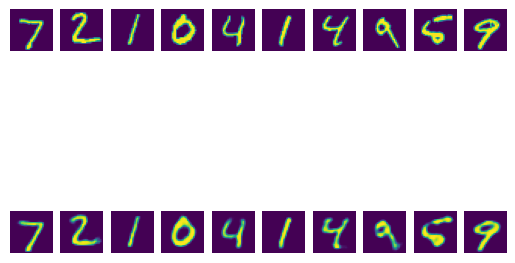

In [1]:
#!/usr/bin/env python3

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

autoencoder = __import__('1-sparse').autoencoder

SEED = 0

import os
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_ENABLE_ONEDNN_OPTS']= '0'
import random
random.seed(SEED)
import numpy as np
np.random.seed(SEED)
import tensorflow as tf
tf.random.set_seed(SEED)

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

encoder, decoder, auto = autoencoder(784, [128, 64], 32, 10e-6)
auto.fit(x_train, x_train, epochs=50,batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))
encoded = encoder.predict(x_test[:10])
print(np.mean(encoded))
reconstructed = decoder.predict(encoded)

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape((28, 28)))
    ax = plt.subplot(2, 10, i + 11)
    ax.axis('off')
    plt.imshow(reconstructed[i].reshape((28, 28)))
plt.show()